# Understanding factors for Churn in a Telecom Company

Case Study- Churn in Telecom's dataset

Source credit- https://www.kaggle.com/becksddf/churn-in-telecoms-dataset


# Context:
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The dataset contains the above information about the data.


Inspiration:
To explore this type of models and learn more about the subject as  the questions include exploratory data analysis.



# About the Data:

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

Account Length: how long account has been active.
VMail Message: Number of voice mail messages send by the customer.

Day Mins: Time spent on day calls.

Eve Mins: Time spent on evening calls.

Night Mins: Time spent on night calls.

Intl Mins: Time spent on international calls.

Day Calls: Number of day calls by customers.

Eve Calls: Number of evening calls by customers.

Intl Calls: Number of international calls.

Night Calls: Number of night calls by customer.

Day Charge: Charges of Day Calls.

Night Charge: Charges of Night Calls.

Eve Charge: Charges of evening Calls.

Intl Charge: Charges of international calls.

VMail Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area Code: Area Code of customer.

Intl Plan: Does customer have international plan or not.

CustServ Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)


# 1.Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Import the data

In [2]:
df = pd.read_csv('Churn.csv')

# 3.How do we display the dataframe?

In [3]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# 4.Calculate Histogram for time spent on day calls by customers.

<AxesSubplot: xlabel='total day minutes', ylabel='Count'>

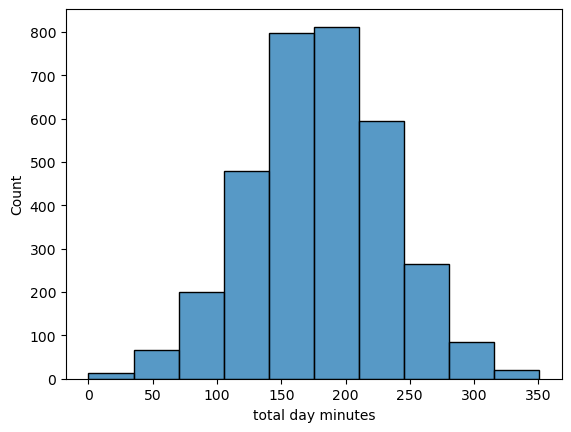

In [5]:
sns.histplot(df['total day minutes'],bins=10)

# 5.How do we categorize the churner and the non-churner for the time spent on day calls(total day minutes)?

<AxesSubplot: xlabel='total day minutes', ylabel='Count'>

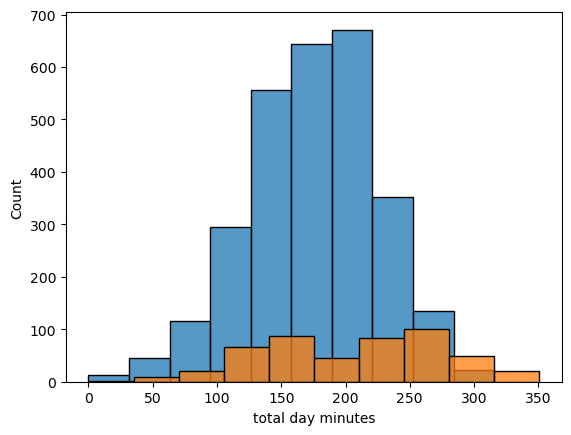

In [6]:
churner = df[df.churn == False]
sns.histplot(churner['total day minutes'],bins=10)
nonchurner = df[df.churn == True]
sns.histplot(nonchurner['total day minutes'],bins=10)

# 6.Find the number of customers who did opt for voice mail plan

In [7]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

# 7.Produce a countplot for the above result

<AxesSubplot: xlabel='voice mail plan', ylabel='count'>

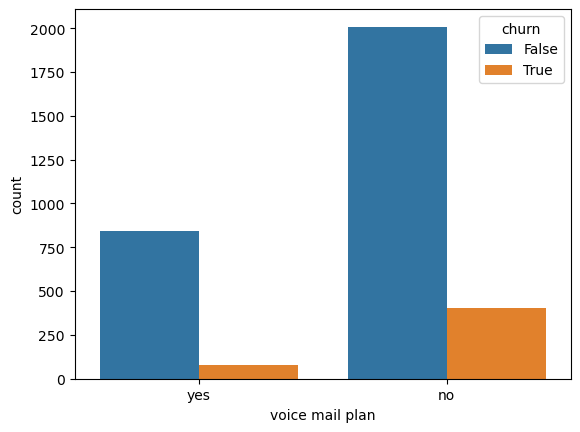

In [8]:
sns.countplot(data=df, x='voice mail plan',hue='churn')

# 8.Create a boxplot for a categorical variable(international plan) and continuous variable(area code).

<AxesSubplot: xlabel='international plan', ylabel='area code'>

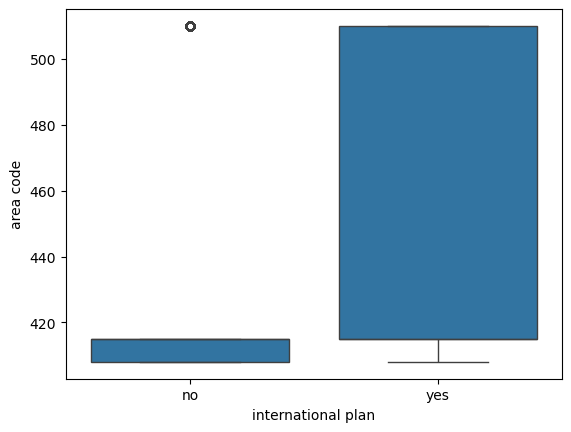

In [9]:
sns.boxplot(data=df, x='international plan', y='area code')

# 9. Create a crosstab for the area code to find the churner or non-churner.

In [10]:
pd.crosstab(df['area code'],df['churn'])

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


# 10. How to pivot information using python for categorical values? Plot one.

In [11]:
pd.pivot_table(df, index=['area code','voice mail plan'], columns='international plan',aggfunc='count')

account length      churn       \
international plan                    no  yes    no  yes   
area code voice mail plan                                  
408       no                         567   51   567   51   
          yes                        200   20   200   20   
415       no                        1082  102  1082  102   
          yes                        423   48   423   48   
510       no                         531   78   531   78   
          yes                        207   24   207   24   

                          customer service calls      number vmail messages  \
international plan                            no  yes                    no   
area code voice mail plan                                                     
408       no                                 567   51                   567   
          yes                                200   20                   200   
415       no                                1082  102                  1082   
          yes                                423   48                   423   
510       no                                 531   78                   531   
          yes                                207   24                   207   

                               phone number       ... total intl charge       \
international plan         yes           no  yes  ...                no  yes   
area code voice mail plan                         ...                          
408       no                51          567   51  ...               567   51   
          yes               20          200   20  ...               200   20   
415       no               102         1082  102  ...              1082  102   
          yes               48          423   48  ...               423   48   
510       no                78          531   78  ...               531   78   
          yes               24          207   24  ...               207   24   

                          total intl minutes      total night calls       \
international plan                        no  yes                no  yes   
area code voice mail plan                                                  
408       no                             567   51               567   51   
          yes                            200   20               200   20   
415       no                            1082  102              1082  102   
          yes                            423   48               423   48   
510       no                             531   78               531   78   
          yes                            207   24               207   24   

                          total night charge      total night minutes       
international plan                        no  yes                  no  yes  
area code voice mail plan                                                   
408       no                             567   51                 567   51  
          yes                            200   20                 200   20  
415       no                            1082  102                1082  102  
          yes                            423   48                 423   48  
510       no                             531   78                 531   78  
          yes                            207   24                 207   24  

[6 rows x 36 columns]

# 11.Now calculate the total international minutes for all the combinations above. 

In [12]:
pd.pivot_table(df, index=['area code','voice mail plan'], columns='international plan',values='total intl minutes',aggfunc='sum')

international plan              no     yes
area code voice mail plan                 
408       no                5719.5   551.9
          yes               2000.1   214.4
415       no               11130.6  1081.8
          yes               4368.7   537.3
510       no                5410.7   793.1
          yes               2058.4   254.4

# 12.How do we understand the correlation between the variables or the columns within the dataframe. Plot one and analyze.

<AxesSubplot: >

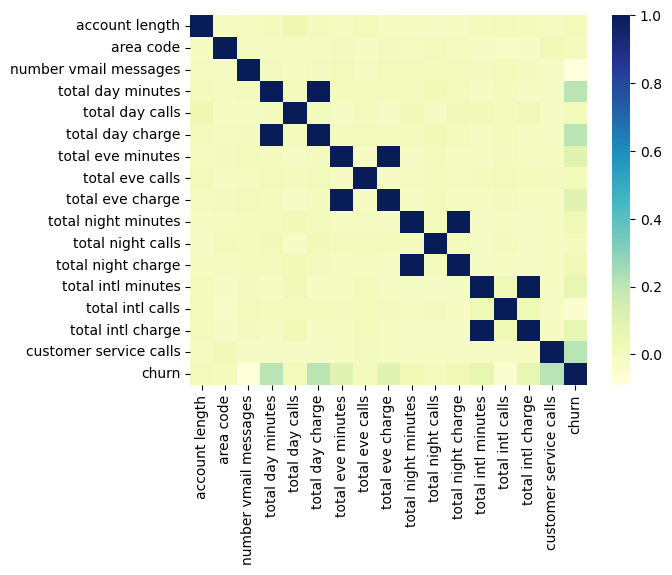

In [13]:
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu')

# 13. Find Standard deviation of total night calls.

In [14]:
df['total night calls'].std()

19.568609346058615

# 14.Plot a distplot for the above result to look at specifically total night calls.

/tmp/ipykernel_27678/2953597321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total night calls'])


<AxesSubplot: xlabel='total night calls', ylabel='Density'>

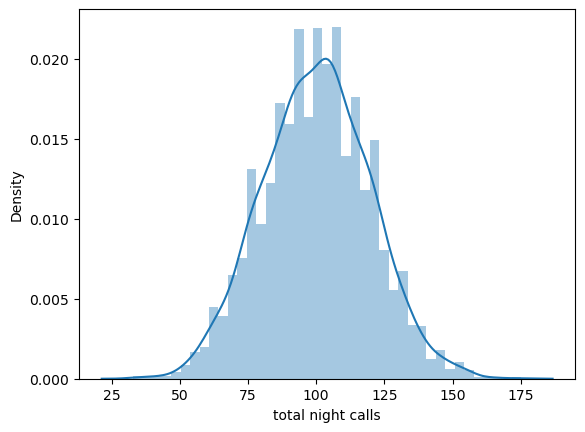

In [15]:
 sns.distplot(df['total night calls'])

# 15.Plot a histogram to group it by churner or non-churner for the column area code.

In [16]:
temp = pd.crosstab(df['area code'],df['churn'])


<AxesSubplot: xlabel='area code', ylabel='Count'>

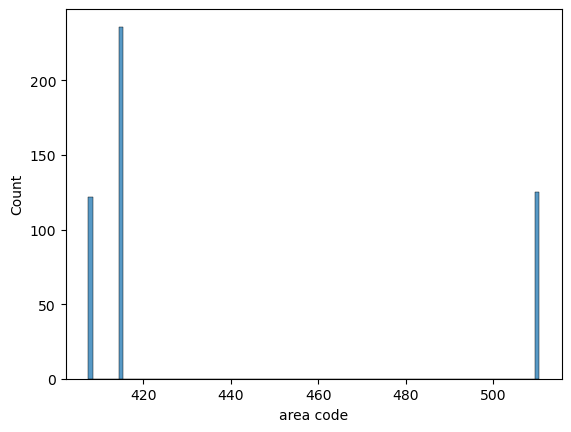

In [25]:
sns.histplot(df[df.churn==True],x='area code',bins=5)

<AxesSubplot: xlabel='area code', ylabel='Count'>

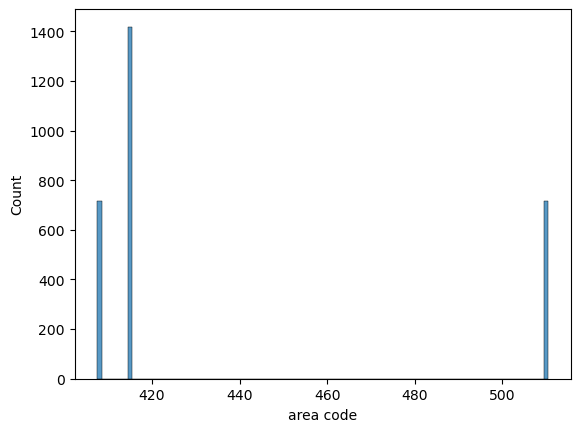

In [24]:
sns.histplot(df[df.churn==False],x='area code')

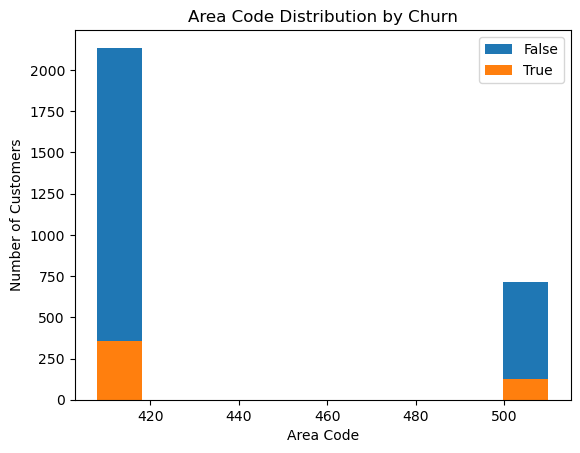

In [19]:
churn_groups = df.groupby('churn')

fig, ax = plt.subplots()
for name, group in churn_groups:
    ax.hist(group['area code'], label=name)

ax.set_xlabel('Area Code')
ax.set_ylabel('Number of Customers')
ax.set_title('Area Code Distribution by Churn')
ax.legend()
plt.show()

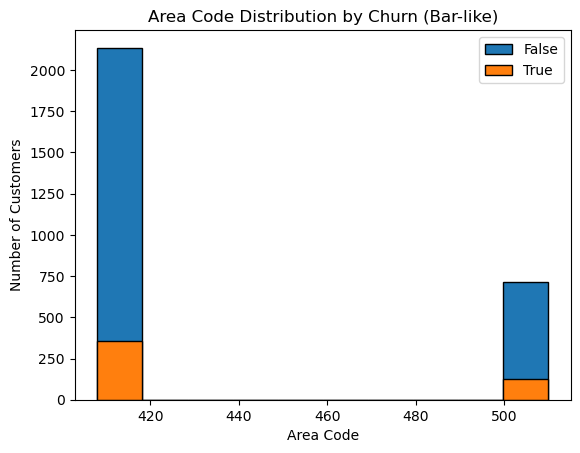

In [20]:
churn_groups = df.groupby('churn')

fig, ax = plt.subplots()
for name, group in churn_groups:
    ax.hist(group['area code'],label=name, edgecolor='black')

ax.set_xlabel('Area Code')
ax.set_ylabel('Number of Customers')
ax.set_title('Area Code Distribution by Churn (Bar-like)')
ax.legend()
plt.show()

# 16. Calculate areawise churner or non-churner using countplot.

<AxesSubplot: xlabel='area code', ylabel='count'>

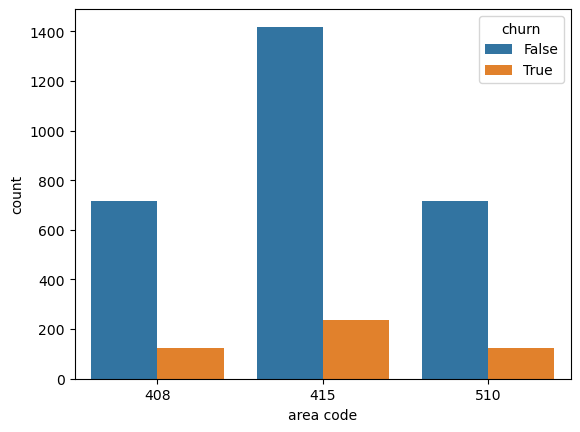

In [21]:
df['area code']= df['area code'].astype('category')
sns.countplot(x="area code", hue= "churn", data=df)